In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv("/content/train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df = df.drop('Name', axis=1)

In [7]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
from sklearn.preprocessing import LabelEncoder
genencoder = LabelEncoder()
df['Sex'] = genencoder.fit_transform(df['Sex'])
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,1,35.0,0,0,373450,8.0500,NaN,S


In [10]:
df1 = df.drop(['PassengerId','Ticket','Cabin','Embarked'],axis=1)
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [11]:
df2 = df1.drop(['SibSp','Parch'],axis=1)

In [12]:
df2.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.0,7.2500
1,1,1,0,38.0,71.2833
2,1,3,0,26.0,7.9250
3,1,1,0,35.0,53.1000
4,0,3,1,35.0,8.0500


In [14]:
df2.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare'], dtype='object')

In [15]:
df2.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
Fare,0


In [16]:
meAge = df2['Age'].median()
df2.fillna(meAge,inplace=True)

In [17]:
df2.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
Fare,0


### Also if you want you can do z-score test to remove outliers in the model however since we are doing a decision tree model it is not necessary for us to do z-score test or removal of outlier, as it impacts the gini impurity or entropy function used here. There should be little error.

### If we are doing a regression model instead of classification we need to remove outlier

### Some times it is good to remove outliers whereas sometime it is not good, it depends each time and varies depending on the situation. Let's remove outlier on this titanic side

In [18]:
cols = list(df2.columns)
cols.remove('Survived')
cols

['Pclass', 'Sex', 'Age', 'Fare']

In [19]:
col_mean = df2[cols].mean()
col_std = df2[cols].std()

z_score = (df2[cols] - col_mean)/col_std

z_threshold = 3

In [20]:
for i in z_score:
    df2['Z_score'+str(i)]=z_score[i]

outliers = np.any(np.abs(z_score) > z_threshold,axis=1)
df3 = df2[~outliers]

In [21]:
-(df3.shape[0]-df2.shape[0])

27

### 27 outliers have been removed

In [22]:
df3.shape

(864, 9)

In [23]:
df3.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Z_scorePclass',
       'Z_scoreSex', 'Z_scoreAge', 'Z_scoreFare'],
      dtype='object')

In [24]:
columns_to_remove = ['Z_scorePclass',
       'Z_scoreSex', 'Z_scoreAge', 'Z_scoreFare']
df3 = df3.drop(columns=columns_to_remove)
df3.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.0,7.2500
1,1,1,0,38.0,71.2833
2,1,3,0,26.0,7.9250
3,1,1,0,35.0,53.1000
4,0,3,1,35.0,8.0500


In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
new_df = scaler.fit_transform(df3.drop('Survived',axis=1))

In [26]:
X = new_df
y = df3.Survived

In [27]:
new_df

array([[ 0.8017188 ,  0.7330529 , -0.55868162, -0.6551603 ],
       [-1.64161469, -1.36415804,  0.72218694,  1.52409036],
       [ 0.8017188 , -1.36415804, -0.23846448, -0.63218797],
       ...,
       [ 0.8017188 , -1.36415804, -0.07835591, -0.10382434],
       [-1.64161469,  0.7330529 , -0.23846448,  0.11909236],
       [ 0.8017188 ,  0.7330529 ,  0.24186123, -0.63814376]])

In [28]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [29]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.3,random_state=42)
X_train

array([[ 0.8017188 ,  0.7330529 , -0.79884447, -0.63318173],
       [ 0.8017188 , -1.36415804, -0.07835591, -0.63814376],
       [ 0.8017188 ,  0.7330529 ,  0.08175266, -0.57858586],
       ...,
       [-1.64161469, -1.36415804, -0.79884447,  0.11909236],
       [-1.64161469,  0.7330529 ,  0.4019698 ,  0.00167822],
       [ 0.8017188 ,  0.7330529 , -0.07835591, -0.63318173]])

In [30]:
y_train

,Survived
877,0
198,1
286,1
480,0
499,0
...,...
109,1
276,0
887,1
447,1


In [31]:
print(f"Length of the training dataset : {len(X_train)}")
print()
print(f"Length of the testing dataset : {len(X_val)}")

Length of the training dataset : 604

Length of the testing dataset : 260


### Model building

In [32]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [33]:
model.score(X_val,y_val)*100

77.3076923076923

In [34]:
from sklearn.linear_model import LinearRegression
mdl = LinearRegression()
mdl.fit(X_train,y_train)
mdl.score(X_val,y_val)*100

34.843171911673984

In [35]:
from sklearn.linear_model import SGDRegressor
model_3 = SGDRegressor()
model_3.fit(X_train,y_train)
model_3.score(X_val,y_val)*100

34.48450135180665

In [36]:
from sklearn.linear_model import LogisticRegression
model_4 = LogisticRegression()
model_4.fit(X_train,y_train)
model_4.score(X_val,y_val)*100

77.3076923076923

In [37]:
from sklearn.svm import SVC
model_5 = SVC(kernel='rbf')
model_5.fit(X_train,y_train)
model_5.score(X_val,y_val)*100

79.23076923076923

In [38]:
from sklearn.neighbors import KNeighborsClassifier
model_6 = KNeighborsClassifier(n_neighbors=4)
model_6.fit(X_train,y_train)
model_6.score(X_val,y_val)*100

81.92307692307692

In [39]:
from sklearn.ensemble import RandomForestClassifier
model_7 = RandomForestClassifier(n_estimators=40)
model_7.fit(X_train,y_train)
model_7.score(X_val,y_val)*100

81.92307692307692

In [40]:
from sklearn.naive_bayes import GaussianNB
model_8 = GaussianNB()
model_8.fit(X_train,y_train)
model_8.score(X_val,y_val)*100

76.53846153846153

In [41]:
from sklearn.ensemble import AdaBoostClassifier
model_9 = AdaBoostClassifier(n_estimators=20)
model_9.fit(X_train,y_train)
model_9.score(X_val,y_val)*100

76.92307692307693

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

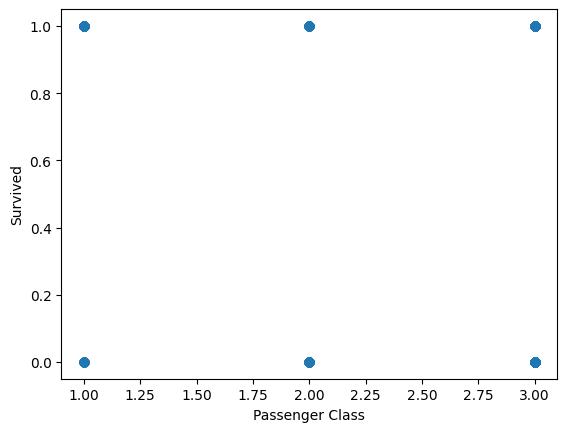

In [43]:
plt.scatter(df3.Pclass,df3.Survived)
plt.xlabel('Passenger Class')
plt.ylabel('Survived')
plt.show()

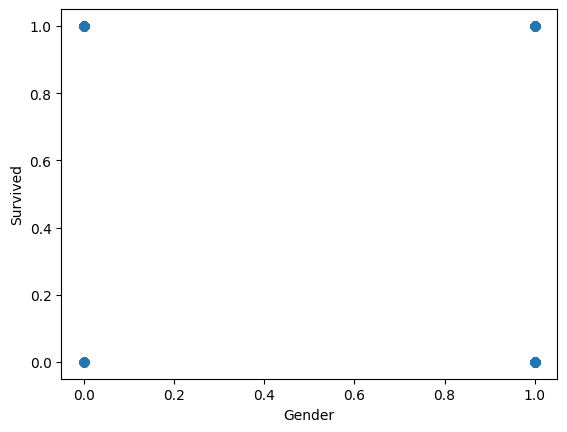

In [44]:
plt.scatter(df3.Sex,df3.Survived)
plt.xlabel('Gender')
plt.ylabel('Survived')
plt.show()

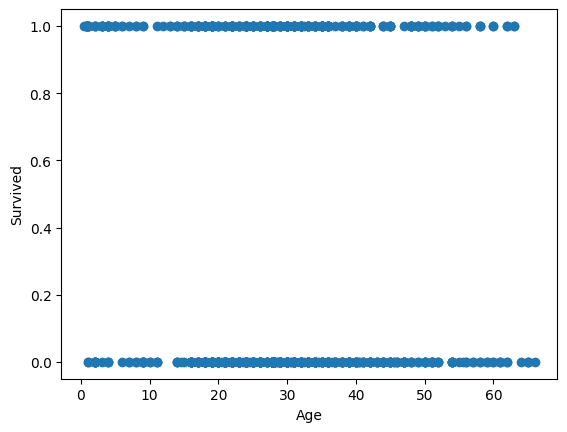

In [45]:
plt.scatter(df3.Age,df3.Survived)
plt.xlabel('Age')
plt.ylabel('Survived')
plt.show()

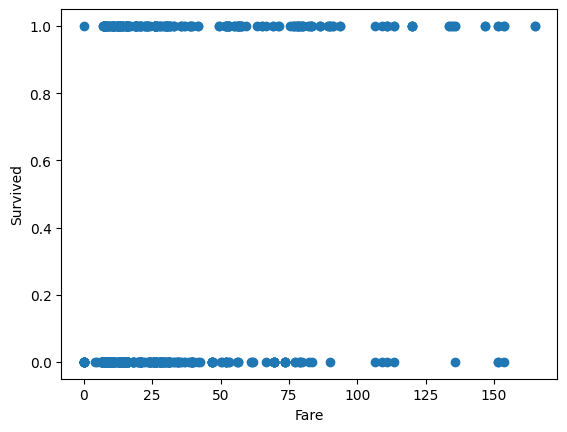

In [46]:
plt.scatter(df3.Fare,df3.Survived)
plt.xlabel('Fare')
plt.ylabel('Survived')
plt.show()

### We can use any classfication algorithm like sigmoid aka logistic regression for binary classification for more accuracy
### K-Nearest neighbours, random-forest, decision tree